In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [3]:
data=pd.read_csv("UZS=x.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-20,10962.467773,10962.467773,10921.311523,10958.396484,10958.396484,0
1,2022-06-21,10916.333984,10925.000000,10862.619141,10921.311523,10921.311523,0
2,2022-06-22,10903.018555,10903.018555,10812.165039,10875.000000,10875.000000,0
3,2022-06-23,10758.586914,10820.000000,10758.586914,10820.000000,10820.000000,0
4,2022-06-24,10783.454102,10800.000000,10783.454102,10800.000000,10800.000000,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       262 non-null    object 
 1   Open       262 non-null    float64
 2   High       262 non-null    float64
 3   Low        262 non-null    float64
 4   Close      262 non-null    float64
 5   Adj Close  262 non-null    float64
 6   Volume     262 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.5+ KB


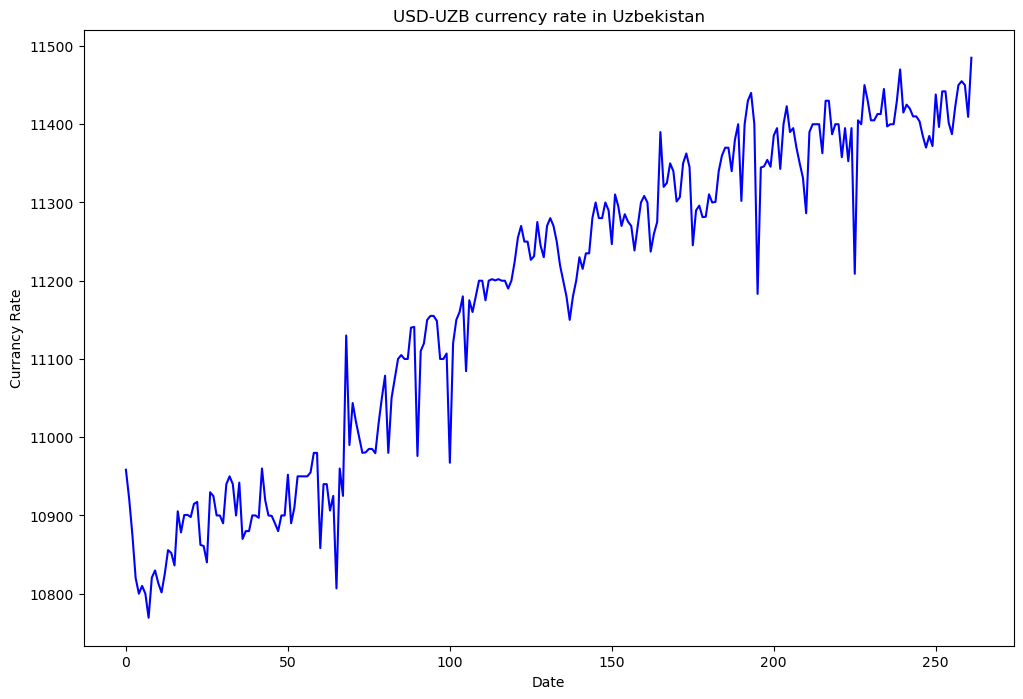

In [14]:
plt.figure(figsize=(12,8))
plt.plot(data['Close'], color='b')
plt.title("USD-UZB currency rate in Uzbekistan")
plt.xlabel("Date")
plt.ylabel("Currancy Rate")
plt.show()

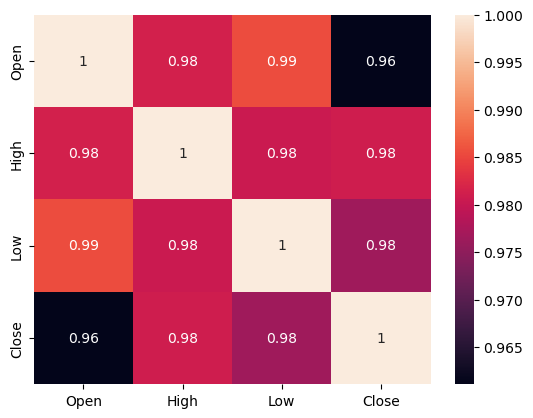

In [20]:
sns.heatmap(data[['Open','High','Low','Close']].corr(), annot=True)
plt.show()

In [22]:
x_train,x_test, y_train, y_test=train_test_split(data[['Open','High','Low']], data[['Close']],
                                                 test_size=0.2, random_state=46)

In [26]:
y_train

,Close
230,11405.000000
192,11430.000000
174,11345.000000
139,11200.000000
226,11405.000000
...,...
235,11397.230469
203,11400.000000
146,11280.000000
40,10900.000000


In [28]:
model=XGBRegressor()
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [34]:
prediction=model.predict(x_test)

In [33]:
pred=pd.DataFrame(data={"predicted value": prediction.flatten()})
pred.head()

,predicted value
0,10819.630859
1,10843.536133
2,10855.608398
3,11232.985352
4,11226.011719
